<a href="https://colab.research.google.com/github/29-min/yolov5--PNP/blob/main/PNP_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YOLOv5 project

Cloning into 'yolov5'...
remote: Enumerating objects: 17045, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17045 (delta 10), reused 18 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17045/17045), 15.67 MiB | 10.25 MiB/s, done.
Resolving deltas: 100% (11705/11705), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-11-11 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 186MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING ⚠️ NMS time limit 0.550s exceeded


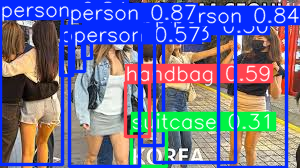

         xmin        ymin        xmax        ymax  confidence  class      name
0   69.372826   21.287056  139.826828  166.219498    0.874938      0    person
1    0.125388   18.269327   62.609436  164.516205    0.841674      0    person
2  218.842773   24.259222  286.136322  167.452667    0.837754      0    person
3  154.235855   24.121614  235.015289  162.558502    0.701589      0    person
4  125.260612   82.982239  149.918228  136.626831    0.587543     26   handbag
5   73.593552   43.524452   84.054695   71.505386    0.568032      0    person
6   60.578194   43.331429   72.463440   75.261856    0.521347      0    person
7   82.386162   41.684536   91.391685   58.814766    0.333385      0    person
8  131.381134  130.351349  166.163467  166.669510    0.308251     28  suitcase
9  141.158752   34.245411  163.357086  145.826248    0.297464      0    person


In [ ]:
# 필요한 라이브러리 설치 (PyTorch, OpenCV)
!pip install torch torchvision opencv-python

# YOLOv5 GitHub repository를 클론
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

# 모델 로드 (YOLOv5s는 가장 작은 모델)
import torch
import requests
from PIL import Image
from io import BytesIO

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQE27RIX9QnWP9__cdTryIdWndTgq3DQxL9TQ&s'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# 이미지에서 객체 탐지 수행
results = model(img)
results.show()  # 결과 시각화

# 탐지된 객체 정보 출력
print(results.pandas().xyxy[0])


In [ ]:
# 감지된 객체 목록에서 클래스별로 카운팅
detections = results.pandas().xyxy[0]
counts = detections['name'].value_counts()  # 객체의 클래스별 카운트
print(counts)


name
person      8
handbag     1
suitcase    1
Name: count, dtype: int64


시계열 분석 (아직 짜는중)


In [ ]:
from keras.layers import GRU

model = Sequential()
model.add(GRU(50, return_sequences=False, input_shape=(10, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(data, labels, epochs=10, batch_size=32)
predictions = model.predict(data)


NameError: name 'Sequential' is not defined

In [ ]:
from google.colab import files

uploaded = files.upload()  # 파일 업로드 창이 뜸

KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: Mountpoint must not already contain files

In [ ]:
import torch
import cv2
import pandas as pd
from collections import defaultdict
from datetime import datetime, timedelta

# 1. YOLO 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-12 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
import torch
import cv2
import pandas as pd
from collections import defaultdict
from datetime import datetime, timedelta

# 1. YOLO 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# 2. 비디오 불러오기
video_path = '/content/drive/MyDrive/Colab Notebooks/dataset/data(2).webm'
cap = cv2.VideoCapture(video_path)

# 3. 통계 수집을 위한 데이터 구조 정의
people_count_by_time = defaultdict(int)  # 시간대별 사람 수
object_count_by_time = defaultdict(lambda: defaultdict(int))  # 시간대별 객체 수

# 시작 시간 설정 (예시: 영상의 시작 시간)
start_time = datetime.strptime("2024-11-10 08:00:00", "%Y-%m-%d %H:%M:%S")
frame_rate = cap.get(cv2.CAP_PROP_FPS)
frame_interval = int(frame_rate * 60)  # 1분에 한 번씩 집계

# 4. 비디오 프레임 분석
frame_number = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # 프레임이 1분 간격에 해당하는지 확인
    if frame_number % frame_interval == 0:
        # YOLO 모델을 이용한 객체 감지
        results = model(frame)
        detected_objects = results.pandas().xyxy[0]

        # 현재 시간 계산 (프레임별)
        current_time = start_time + timedelta(seconds=frame_number // frame_rate)

        # 감지된 객체에 대한 통계 집계
        for _, row in detected_objects.iterrows():
            label = row['name']
            if label == 'person':
                people_count_by_time[current_time.strftime("%Y-%m-%d %H:%M")] += 1
            else:
                object_count_by_time[current_time.strftime("%Y-%m-%d %H:%M")][label] += 1

    frame_number += 1

# 5. 통계 데이터프레임 변환
people_count_df = pd.DataFrame(list(people_count_by_time.items()), columns=['Time', 'People Count'])
object_count_df = pd.DataFrame(
    [(time, obj, count) for time, objects in object_count_by_time.items() for obj, count in objects.items()],
    columns=['Time', 'Object', 'Count']
)

# 결과 출력
print("People Count by Time:")
print(people_count_df)
print("\nObject Count by Time:")
print(object_count_df)

# Release video capture
cap.release()

/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-11-11 Python-3.10.12 torch-2.5.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 22.0MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.am

People Count by Time:
               Time  People Count
0  2024-11-10 08:05             1
1  2024-11-10 08:06             1

Object Count by Time:
               Time  Object  Count
0  2024-11-10 08:04  remote      1


In [ ]:
# 1. 통계를 텍스트 파일로 저장
with open('people_count_by_time.txt', 'w') as f:
    f.write("Time, People Count\n")
    for time, count in people_count_by_time.items():
        f.write(f"{time}, {count}\n")

with open('object_count_by_time.txt', 'w') as f:
    f.write("Time, Object, Count\n")
    for time, objects in object_count_by_time.items():
        for obj, count in objects.items():
            f.write(f"{time}, {obj}, {count}\n")

# 2. 통계 데이터 시각화
# 시간대별 사람 수 그래프
plt.figure(figsize=(10, 5))
plt.plot(people_count_df['Time'], people_count_df['People Count'], marker='o')
plt.xticks(rotation=45)
plt.xlabel("Time")
plt.ylabel("People Count")
plt.title("People Count by Time")
plt.tight_layout()
plt.show()

# 객체 종류별 수량 그래프
# 시간대를 X축, 객체 수량을 Y축으로 하는 그래프
for obj in object_count_df['Object'].unique():
    obj_df = object_count_df[object_count_df['Object'] == obj]
    plt.figure(figsize=(10, 5))
    plt.plot(obj_df['Time'], obj_df['Count'], marker='o', label=obj)
    plt.xticks(rotation=45)
    plt.xlabel("Time")
    plt.ylabel(f"{obj} Count")
    plt.title(f"{obj} Count by Time")
    plt.legend()
    plt.tight_layout()
    plt.show()

#수정


In [ ]:
# GitHub에서 YOLOv5 레포지토리 클론
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# 필요한 패키지 설치
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17045, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17045 (delta 10), reused 18 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17045/17045), 15.66 MiB | 6.56 MiB/s, done.
Resolving deltas: 100% (11700/11700), done.
/content/yolov5/yolov5


In [ ]:
#!pip install yt-dlp #유튜브 영상 다운

In [ ]:
#!yt-dlp 링크링크링크 -f "bestvideo[height<=720]+bestaudio/best[height<=720]" -o "/content/drive/MyDrive/720p_video.mp4" "VIDEO_URL"


In [ ]:
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')



Mounted at /content/drive


#코랩 안닫히게 하는 법
https://sjkoding.tistory.com/79

In [ ]:
# import os
# # 저장 경로 설정
# save_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/'

# # 저장 경로가 없으면 생성
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)

# # 파일 경로 설정
# people_count_file = os.path.join(save_dir, 'people_count_by_time.txt')
# object_count_file = os.path.join(save_dir, 'object_count_by_time.txt')

In [ ]:
#import cv2
# output_path = '/content/drive/MyDrive/Colab Notebooks/dataset/output_detection.mp4'
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# fps = 20.0  # 임의로 설정
# frame_size = (640, 480)  # 임의로 설정

# # VideoWriter 테스트
# out = cv2.VideoWriter(output_path, fourcc, fps, frame_size)
# if not out.isOpened():
#     print("Error: Could not open VideoWriter.")
# else:
#     print("VideoWriter opened successfully!")
# out.release()


NameError: name 'cv2' is not defined

In [ ]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")



CUDA available: True
Device name: Tesla T4


In [ ]:
import os
import torch
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime, timedelta
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

# YOLO 모델 로드 (COCO dataset 기반 weights)
print("Loading YOLO model...")
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
print("Model loaded successfully.")

# 비디오 불러오기 및 저장 설정
video_path = '/content/drive/MyDrive/Colab Notebooks/dataset/data(1).mkv'
cap = cv2.VideoCapture(video_path)

ValueError: Mountpoint must not already contain files

In [ ]:
import sys
sys.path.append('/content/yolov5')
# `torch.cuda.amp.autocast`를 `torch.amp.autocast('cuda')`로 변경
!sed -i 's/torch.cuda.amp.autocast/torch.amp.autocast("cuda")/g' /content/yolov5/models/common.py


sed: can't read /content/yolov5/models/common.py: No such file or directory


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="torch.cuda.amp.autocast")

!rm -rf /root/.cache/torch/hub/ultralytics_yolov5_master
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# GPU 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device).eval()  # 모델을 GPU로 옮기고 평가 모드로 설정
model.half()  # 반정밀도 모드 설정 (속도 향상을 위해)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-11-11 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 306MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
import os
import torch
import cv2
from datetime import datetime, timedelta
from collections import defaultdict
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

# YOLO 모델 로드 (COCO dataset 기반 weights)
print("Loading YOLO model...")
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# GPU 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device).eval()  # 모델을 GPU로 옮기고 평가 모드로 설정

# 비디오 불러오기 및 저장 설정
video_path = '/content/drive/MyDrive/Colab Notebooks/dataset/data(1).mkv'
cap = cv2.VideoCapture(video_path)

# 비디오 파일 열기 확인
if not cap.isOpened():
    print("Error: Could not open video file.")
else:
    print("Video file opened successfully.")

# 비디오 속성 가져오기
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# 결과 영상 저장 설정
output_path = '/content/drive/MyDrive/Colab Notebooks/dataset/output_detection.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

if out.isOpened():
    print("Output video file is open for writing.")
else:
    print("Error: Output video file could not be opened.")

# 프레임별로 객체 감지 및 결과 저장
print("Starting video processing...")
frame_number = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("End of video or error.")
        break

    print(f"Processing frame {frame_number}...")

    # 프레임 색상 변환 및 크기 맞춤
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_resized = cv2.resize(frame_rgb, (640, 640))  # YOLOv5 기본 크기에 맞춤

    # YOLO 모델에 프레임 전달 및 감지 수행
    results = model(frame_resized, size=640)
    results.render()
    print("Frame processed and objects rendered.")

    # 결과 프레임을 저장
    detected_frame = results.ims[0]  # YOLOv5가 자동으로 표시한 결과 프레임
    detected_frame_bgr = cv2.cvtColor(detected_frame, cv2.COLOR_RGB2BGR)  # 다시 BGR로 변환
    out.write(detected_frame_bgr)
    print(f"Frame {frame_number} written to output video.")

    frame_number += 1

# 비디오 캡처와 파일 저장 해제
cap.release()
out.release()
print("Video processing complete and file saved.")


KeyboardInterrupt: 

In [ ]:
import os
import torch
import cv2
import warnings
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

# GPU 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# YOLO 모델 로드 및 GPU 할당
print("Loading YOLO model...")
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)  # AutoShape 없이 호출
model.to(device).eval()

# CUDA 관련 오류 및 경고 메시지 비활성화
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.enabled = False

# FutureWarning 억제
warnings.filterwarnings("ignore", category=FutureWarning, message=".*autocast.*")

# 비디오 불러오기 및 저장 설정
video_path = '/content/drive/MyDrive/Colab Notebooks/dataset/data(1).mkv'
cap = cv2.VideoCapture(video_path)

# 비디오 파일 열기 확인
if not cap.isOpened():
    print("Error: Could not open video file.")
else:
    print("Video file opened successfully.")

# 비디오 속성 가져오기
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# 결과 영상 저장 설정
output_path = '/content/drive/MyDrive/Colab Notebooks/dataset/output_detection.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

if out.isOpened():
    print("Output video file is open for writing.")
else:
    print("Error: Output video file could not be opened.")

# 프레임별로 객체 감지 및 결과 저장
print("Starting video processing...")
frame_number = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("End of video or error.")
        break

    print(f"Processing frame {frame_number}...")

    # 프레임 색상 변환
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # YOLO 모델에 프레임 전달 및 감지 수행
    with torch.no_grad():  # 메모리 최적화
        results = model(frame_rgb)

    # 결과 프레임을 저장
    results.render()
    detected_frame = results.ims[0]  # YOLOv5가 자동으로 표시한 결과 프레임
    detected_frame_bgr = cv2.cvtColor(detected_frame, cv2.COLOR_RGB2BGR)  # 다시 BGR로 변환
    out.write(detected_frame_bgr)
    print(f"Frame {frame_number} written to output video.")

    frame_number += 1

# 비디오 캡처와 파일 저장 해제
cap.release()
out.release()
print("Video processing complete and file saved.")

# # GPU 메모리 사용 확인
# print("Checking GPU memory usage...")
# !nvidia-smi


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device: cuda
Loading YOLO model...


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-11 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Frame 261 written to output video.
Processing frame 262...
Frame 262 written to output video.
Processing frame 263...
Frame 263 written to output video.
Processing frame 264...
Frame 264 written to output video.
Processing frame 265...
Frame 265 written to output video.
Processing frame 266...
Frame 266 written to output video.
Processing frame 267...
Frame 267 written to output video.
Processing frame 268...
Frame 268 written to output video.
Processing frame 269...
Frame 269 written to output video.
Processing frame 270...
Frame 270 written to output video.
Processing frame 271...
Frame 271 written to output video.
Processing frame 272...
Frame 272 written to output video.
Processing frame 273...
Frame 273 written to output video.
Processing frame 274...
Frame 274 written to output video.
Processing frame 275...
Frame 275 written to output video.
Processing frame 276...
Frame 276 written to output video.
Processing frame 277...
Frame 277 written to

In [ ]:


# 비디오 불러오기 및 저장 설정
video_path = '/content/drive/MyDrive/Colab Notebooks/dataset/data(1).mkv'
cap = cv2.VideoCapture(video_path)

# 비디오 파일 열기 확인
if not cap.isOpened():
    print("Error: Could not open video file.")
else:
    print("Video file opened successfully.")

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# 결과 영상 저장
output_path = '/content/drive/MyDrive/Colab Notebooks/dataset/output_detection.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# 통계 수집을 위한 데이터 구조 정의
people_count_by_time = defaultdict(int)
object_count_by_time = defaultdict(lambda: defaultdict(int))

# 시작 시간 설정
start_time = datetime.strptime("2024-11-10 08:00:00", "%Y-%m-%d %H:%M:%S")
frame_rate = cap.get(cv2.CAP_PROP_FPS)
frame_interval = int(frame_rate * 60)  # 1분 간격

# 누적 통계 변수
current_people_count = 0
current_object_count = defaultdict(int)

print("Starting video processing...")
frame_number = 0
frame_skip = 5  # 감지를 수행할 프레임 간격

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("End of video or error.")
        break

    # 일부 프레임만 감지
    if frame_number % frame_skip == 0:
        print(f"Processing frame {frame_number}...")

        # 프레임 색상 변환 및 크기 축소
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_resized = cv2.resize(frame_rgb, (640, 640))  # YOLOv5 기본 크기 맞춤

        # YOLOv5 모델에 직접 Numpy 이미지 전달
        results = model(frame_resized, size=640)  # 크기를 명시적으로 설정

        # 감지된 객체가 있는지 확인
        detected_objects = results.pandas().xyxy[0]
        print(f"Objects detected: {len(detected_objects)}")

        # 현재 프레임의 객체 통계 누적
        for _, row in detected_objects.iterrows():
            label = row['name']
            if label == 'person':
                current_people_count += 1
            else:
                current_object_count[label] += 1

        # 결과 프레임에 감지 객체 표시
        results.render()  # YOLOv5가 자동으로 감지 객체를 표시
        detected_frame = results.ims[0]  # 또는 results.ims[0]로 자동 표시된 프레임 할당
        out.write(detected_frame)  # 결과 프레임을 저장

    # 1분 간격으로 누적된 통계를 집계 및 저장
    if frame_number > 0 and frame_number % frame_interval == 0:
        print(f"Updating statistics for minute interval at frame {frame_number}")
        current_time = start_time + timedelta(seconds=frame_number // frame_rate)
        time_key = current_time.strftime("%Y-%m-%d %H:%M")

        # 집계 결과를 통계 딕셔너리에 저장
        people_count_by_time[time_key] = current_people_count
        for obj, count in current_object_count.items():
            object_count_by_time[time_key][obj] = count

        # 1분이 지나면 누적 통계를 초기화
        current_people_count = 0
        current_object_count = defaultdict(int)

    frame_number += 1

# 비디오 캡처와 파일 저장 해제
cap.release()
out.release()
print("Video processing complete.")


Video file opened successfully.
Starting video processing...
Processing frame 0...
Objects detected: 0


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 150...
Objects detected: 9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 300...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 450...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 600...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 750...
Objects detected: 10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 900...
Objects detected: 6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 1050...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 1200...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 1350...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 1500...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 1650...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Updating statistics for minute interval at frame 1798
Processing frame 1800...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 1950...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 2100...
Objects detected: 2


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 2250...
Objects detected: 2


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 2400...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 2550...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 2700...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 2850...
Objects detected: 2


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 3000...
Objects detected: 0


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 3150...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 3300...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 3450...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Updating statistics for minute interval at frame 3596
Processing frame 3600...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 3750...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 3900...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 4050...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 4200...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 4350...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 4500...
Objects detected: 6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 4650...
Objects detected: 8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 4800...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 4950...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 5100...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 5250...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Updating statistics for minute interval at frame 5394
Processing frame 5400...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 5550...
Objects detected: 6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 5700...
Objects detected: 2


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 5850...
Objects detected: 0


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 6000...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 6150...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 6300...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 6450...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 6600...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 6750...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 6900...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 7050...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Updating statistics for minute interval at frame 7192
Processing frame 7200...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 7350...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 7500...
Objects detected: 6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 7650...
Objects detected: 6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 7800...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 7950...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 8100...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 8250...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 8400...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 8550...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 8700...
Objects detected: 2


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 8850...
Objects detected: 2


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Updating statistics for minute interval at frame 8990
Processing frame 9000...
Objects detected: 6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 9150...
Objects detected: 8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 9300...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 9450...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 9600...
Objects detected: 2


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 9750...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 9900...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 10050...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 10200...
Objects detected: 2


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 10350...
Objects detected: 6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 10500...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 10650...
Objects detected: 6


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Updating statistics for minute interval at frame 10788
Processing frame 10800...
Objects detected: 7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 10950...
Objects detected: 8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 11100...
Objects detected: 8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 11250...
Objects detected: 7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 11400...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 11550...
Objects detected: 8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 11700...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 11850...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 12000...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 12150...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 12300...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 12450...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Updating statistics for minute interval at frame 12586
Processing frame 12600...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 12750...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 12900...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 13050...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 13200...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 13350...
Objects detected: 8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 13500...
Objects detected: 8


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 13650...
Objects detected: 7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 13800...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 13950...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 14100...
Objects detected: 15


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 14250...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Updating statistics for minute interval at frame 14384
Processing frame 14400...
Objects detected: 2


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 14550...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 14700...
Objects detected: 12


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 14850...
Objects detected: 11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 15000...
Objects detected: 13


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 15150...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 15300...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 15450...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 15600...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 15750...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 15900...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 16050...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Updating statistics for minute interval at frame 16182
Processing frame 16200...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 16350...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 16500...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 16650...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 16800...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 16950...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 17100...
Objects detected: 3


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 17250...
Objects detected: 4


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 17400...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 17550...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 17700...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 17850...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Updating statistics for minute interval at frame 17980
Processing frame 18000...
Objects detected: 5


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 18150...
Objects detected: 2


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 18300...
Objects detected: 9


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 18450...
Objects detected: 11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 18600...
Objects detected: 11


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 18750...
Objects detected: 10


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing frame 18900...
Objects detected: 7


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


End of video or error.
Video processing complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임을 날짜 형식으로 변환
people_count_df['Time'] = pd.to_datetime(people_count_df['Time'])
object_count_df['Time'] = pd.to_datetime(object_count_df['Time'])

# 사람 수 통계 시각화
plt.figure(figsize=(12, 6))
plt.plot(people_count_df['Time'], people_count_df['People Count'], marker='o')
plt.xticks(rotation=45)
plt.xlabel("Time")
plt.ylabel("People Count")
plt.title("People Count by Time")
plt.tight_layout()
plt.grid()  # 그리드 추가로 가독성 향상
plt.show()
plt.close()  # figure 닫기

# 객체별 카운트 시각화
unique_objects = object_count_df['Object'].unique()
if len(unique_objects) > 0:
    for obj in unique_objects:
        obj_df = object_count_df[object_count_df['Object'] == obj]
        plt.figure(figsize=(12, 6))
        plt.plot(obj_df['Time'], obj_df['Count'], marker='o', label=obj)
        plt.xticks(rotation=45)
        plt.xlabel("Time")
        plt.ylabel(f"{obj} Count")
        plt.title(f"{obj} Count by Time")
        plt.legend()
        plt.tight_layout()
        plt.grid()  # 그리드 추가
        plt.show()
        plt.close()  # figure 닫기
else:
    print("Warning: No objects found for object count plots.")


#다시

##CUDA로 변경 (에러 메시지 안뜨게 수정해봤으나 COLAB PRO 안쓰면 실행 안됨)

In [ ]:
import cv2
import torch
import pandas as pd
from collections import defaultdict
from datetime import datetime, timedelta
import shutil

# Remove the cached YOLOv5 repository to ensure the latest version is used
shutil.rmtree('/root/.cache/torch/hub/ultralytics_yolov5_master', ignore_errors=True)

# Modify the YOLOv5 code to replace the deprecated function
common_file = '/content/yolov5/models/common.py'

with open(common_file, 'r') as file:
    filedata = file.read()

# Replace 'torch.cuda.amp.autocast' with 'torch.amp.autocast'
filedata = filedata.replace('torch.cuda.amp.autocast', 'torch.amp.autocast')

with open(common_file, 'w') as file:
    file.write(filedata)

# Load the YOLOv5 model from the local repository
model = torch.hub.load('/content/yolov5', 'yolov5s', source='local', pretrained=True, force_reload=True)
model.to('cuda')  # Move the model to GPU

In [ ]:
# Video and output paths (replace with your actual paths)
videopath = '/content/drive/MyDrive/Colab Notebooks/dataset/data(2).webm'  # Replace with your video path
output_video_path = '/content/drive/MyDrive/Colab Notebooks/dataset/output_video.mp4'  # Replace with your output video path
output_txt_path = '/content/drive/MyDrive/Colab Notebooks/dataset/detection_statistics.txt'  # Replace with your output statistics path

# Load the video
cap = cv2.VideoCapture(videopath)
fps = cap.get(cv2.CAP_PROP_FPS) or 30  # Default to 30 if FPS not available
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) or 640  # Default width
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) or 480  # Default height

# Video writer setup
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Initialize variables
statistics = defaultdict(list)
time_intervals = []
start_time = datetime.now()
frame_skip = 30  # Adjust as needed (process every 30 frames)

# Initialize frame_number before the loop
frame_number = -1  # Start from -1 because we increment at the start

# Define the letterbox function (if needed)
def letterbox(img, new_shape=(640, 640), color=(114, 114, 114)):
    shape = img.shape[:2]  # Current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)
    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    # Compute padding
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding
    dw /= 2  # divide padding into 2 sides
    dh /= 2
    # Resize image
    img = cv2.resize(img, new_unpad, interpolation=cv2.INTER_LINEAR)
    # Add border
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return img

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_number += 1  # Increment frame_number at the start

    # Process every 'frame_skip' frames
    if frame_number % frame_skip == 0:
        # Calculate current time
        elapsed_time = frame_number / fps
        current_time = start_time + timedelta(seconds=elapsed_time)
        time_str = current_time.strftime("%Y-%m-%d %H:%M:%S")
        time_intervals.append(time_str)

        # Prepare frame for detection
        # Resize frame to model's expected input size (if necessary)
        frame_resized = letterbox(frame, new_shape=(640, 640))
        # Convert BGR to RGB
        frame_rgb = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB)

        # Perform detection
        with torch.no_grad():
            results = model(frame_rgb)

        # Process detection results
        detected_objects = results.pandas().xyxy[0]  # Get pandas DataFrame

        # Collect statistics
        frame_stats = defaultdict(int)
        for _, row in detected_objects.iterrows():
            label = row['name']  # Object name
            frame_stats[label] += 1

            # Draw bounding boxes on the frame
            x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
            confidence = row['confidence']
            cv2.rectangle(frame_resized, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(frame_resized, f'{label} {confidence:.2f}', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Update statistics for this time interval
        for obj in statistics:
            if obj in frame_stats:
                statistics[obj].append(frame_stats[obj])
            else:
                statistics[obj].append(0)
        # Handle new objects not yet in statistics
        for obj in frame_stats:
            if obj not in statistics:
                # Initialize previous counts with zeros
                statistics[obj] = [0] * (len(time_intervals) - 1)
                statistics[obj].append(frame_stats[obj])

        # Resize frame back to original size
        frame_output = cv2.resize(frame_resized, (frame_width, frame_height))

        # Write the processed frame
        out.write(frame_output)
    else:
        # Write the unprocessed frame
        out.write(frame)

cap.release()
out.release()

# Verify that all lists in statistics have the same length as time_intervals
num_intervals = len(time_intervals)
for obj, counts in statistics.items():
    if len(counts) < num_intervals:
        statistics[obj].extend([0] * (num_intervals - len(counts)))

# Create the DataFrame
df = pd.DataFrame(statistics, index=time_intervals)
df.index.name = "Time"

# Save the DataFrame to a file
df.to_csv(output_txt_path, sep='\t')

print("Video processing and time-series statistics generation complete.")
print(df.head())  # View the first few entries


YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING ⚠️ NMS time limit 0.550s exceeded
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocas

Video processing and time-series statistics generation complete.
                     person  chair  dining table  cup  oven  ...  cell phone  \
Time                                                         ...               
2024-11-12 03:15:31       0      0             0    0     0  ...           0   
2024-11-12 03:15:32       2      0             0    0     0  ...           0   
2024-11-12 03:15:33       1      0             0    0     0  ...           0   
2024-11-12 03:15:35       1      0             0    0     0  ...           0   
2024-11-12 03:15:36       1      0             0    0     0  ...           0   

                     laptop  fire hydrant  wine glass  kite  
Time                                                         
2024-11-12 03:15:31       0             0           0     0  
2024-11-12 03:15:32       0             0           0     0  
2024-11-12 03:15:33       0             0           0     0  
2024-11-12 03:15:35       0             0           0     0  
20

#CUDA(2)

In [ ]:
import cv2
import torch
import pandas as pd
from collections import defaultdict
from datetime import datetime, timedelta

# 비디오 경로 및 출력 경로 설정
videopath = '/content/drive/MyDrive/Colab Notebooks/dataset/data(2).webm'
output_video_path = '/content/drive/MyDrive/Colab Notebooks/dataset/output_video.mp4'
output_txt_path = '/content/drive/MyDrive/Colab Notebooks/dataset/detection_statistics.txt'

# YOLOv5 모델 로드
model = torch.hub.load('/content/yolov5', 'yolov5s', source='local', pretrained=True)

# 모델을 CUDA로 이동
model.to('cuda')

# 비디오 로드
cap = cv2.VideoCapture(videopath)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# 비디오 출력 설정
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# 프레임 번호 초기화
frame_number = 0  # 프레임 번호 초기화

# 통계 저장을 위한 데이터 구조
statistics = defaultdict(list)
time_intervals = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # 현재 타임라인(분:초 형식으로 표시)
    elapsed_time = frame_number / fps  # 경과 시간 (초)
    minutes = int(elapsed_time // 60)
    seconds = int(elapsed_time % 60)
    time_str = f"{minutes:02d}:{seconds:02d}"  # "MM:SS" 형식으로 변환
    time_intervals.append(time_str)

    # 모델 추론 수행
    with torch.no_grad():
        # 프레임을 RGB로 변환 (YOLOv5는 RGB 이미지를 기대함)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # 모델에 이미지(Numpy 배열)를 전달
        results = model(frame_rgb)

    # 탐지된 객체 정보 추출
    detected_objects = results.pandas().xyxy[0]  # Pandas 데이터프레임으로 결과 가져오기

    # 프레임의 감지 통계 수집
    frame_stats = defaultdict(int)
    for _, row in detected_objects.iterrows():
        label = row['name']
        frame_stats[label] += 1

        # 객체를 비디오에 표시
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        confidence = row['confidence']
        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(frame, f'{label} {confidence:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # 타임라인별 통계 기록
    for obj, count in frame_stats.items():
        statistics[obj].append(count)
    # 통계가 없는 객체는 0으로 채움
    for obj in statistics:
        if obj not in frame_stats:
            statistics[obj].append(0)

    # 결과 프레임 저장
    out.write(frame)
    frame_number += 1

cap.release()
out.release()

# 시계열 데이터프레임 생성
df = pd.DataFrame(statistics, index=time_intervals)
df.index.name = "Time"

# 통계 결과를 텍스트 파일에 저장
df.to_csv(output_txt_path, sep='\t')

print("Video processing and time-series statistics generation complete.")
print(df.head())  # 시계열 통계 데이터 확인


#*여기부터*

##YOLO를 이용한 Object Detection
###COCO dataset weight로 detection, 초당 인구 수 측정
###person 외 detection한 물체도 시간별로 저장
###후처리 후 그래프로 plot
https://www.youtube.com/watch?v=qs9ka1tl__g&t=3s <- 사용한 영상
##영상 다운은 yt-dlp와 ffmpeg 설치하면 터미널로 가능
####https://github.com/yt-dlp/yt-dlp

In [ ]:
# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# YOLOv5 설치
!git clone https://github.com/ultralytics/yolov5  # YOLOv5 git repository
%cd yolov5
!pip install -r requirements.txt  # 필요한 라이브러리 설치


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 24), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.69 MiB | 15.95 MiB/s, done.
Resolving deltas: 100% (11718/11718), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 27.6 MB/s eta 0:00:00


In [ ]:
# Step 1: Change to the /content directory
%cd /content

# Step 2: Remove the existing yolov5 directory
!rm -rf /content/yolov5

# Step 3: Clone the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git /content/yolov5

# Step 4: Change to the yolov5 directory
%cd /content/yolov5

# Step 5: Install dependencies
!pip install -r requirements.txt

# Step 6: Modify the YOLOv5 code to replace the deprecated function
common_file = '/content/yolov5/models/common.py'

with open(common_file, 'r') as file:
    filedata = file.read()

# Replace 'torch.cuda.amp.autocast' with 'torch.amp.autocast'
filedata = filedata.replace('torch.cuda.amp.autocast', 'torch.amp.autocast')

with open(common_file, 'w') as file:
    file.write(filedata)

# Step 7: Clear the Torch Hub Cache
import shutil
shutil.rmtree('/root/.cache/torch/hub/ultralytics_yolov5_master', ignore_errors=True)

# Step 8: Load the YOLOv5 model from the local repository
import torch

model = torch.hub.load('/content/yolov5', 'yolov5s', source='local', pretrained=True, force_reload=True)
model.to('cuda')  # Move the model to GPU

print("YOLOv5 model loaded successfully.")


/content
Cloning into '/content/yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 24), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.69 MiB | 8.74 MiB/s, done.
Resolving deltas: 100% (11718/11718), done.
/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 190MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


YOLOv5 model loaded successfully.


##완성코드

[링크 텍스트](https://)###컨센서스 수정 (0.3)

In [ ]:
import torch

print("CUDA Available:", torch.cuda.is_available())
print("cuDNN Version:", torch.backends.cudnn.version())
print("cuDNN Enabled:", torch.backends.cudnn.enabled)


CUDA Available: True
cuDNN Version: 90100
cuDNN Enabled: True


In [ ]:
import cv2
import pandas as pd
from collections import defaultdict
from datetime import datetime, timedelta

#경고무시
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 비디오 경로 및 출력 경로 설정
videopath = '/content/drive/MyDrive/Colab Notebooks/dataset/12월2일 촬영본.MOV'
output_video_path = '/content/drive/MyDrive/Colab Notebooks/dataset/output_video.mp4'
output_txt_path = '/content/drive/MyDrive/Colab Notebooks/dataset/detection_statistics.txt'

# 비디오 로드
cap = cv2.VideoCapture(videopath)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# 비디오 출력 설정
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# 프레임 간격 설정
frame_skip = 30  # 30프레임마다 (1초 간격으로) 분석
frame_number = 0  # 프레임 번호 초기화

# 통계 저장을 위한 데이터 구조
statistics = defaultdict(list)
time_intervals = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # frame_skip 간격으로만 YOLOv5 모델을 사용하여 객체 탐지
    if frame_number % frame_skip == 0:
        # 현재 타임라인(분:초 형식으로 표시)
        elapsed_time = frame_number / fps  # 경과 시간 (초)
        minutes = int(elapsed_time // 60)
        seconds = int(elapsed_time % 60)
        time_str = f"{minutes:02d}:{seconds:02d}"  # "MM:SS" 형식으로 변환
        time_intervals.append(time_str)

        # YOLO 모델로 객체 탐지 수행
        results = model(frame)
        detected_objects = results.pandas().xyxy[0]  # Pandas 데이터프레임으로 결과 가져오기

        # 프레임의 감지 통계 수집
        frame_stats = defaultdict(int)
        for _, row in detected_objects.iterrows():
            label = row['name']
            frame_stats[label] += 1

            # 객체를 비디오에 표시
            # x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
            # confidence = row['confidence']
            # cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
            # cv2.putText(frame, f'{label} {confidence:.2f}', (x1, y1 - 10),
            #             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # 타임라인별 통계 기록
        for obj, count in frame_stats.items():
            statistics[obj].append(count)
        # 통계가 없는 객체는 0으로 채움
        for obj in statistics:
            if obj not in frame_stats:
                statistics[obj].append(0)

    # 결과 프레임 저장
    # out.write(frame)
    frame_number += 1

cap.release()
out.release()

# # 시계열 데이터프레임 생성
# df = pd.DataFrame(statistics, index=time_intervals)
# df.index.name = "Time"

# # 통계 결과를 텍스트 파일에 저장
# df.to_csv(output_txt_path, sep='\t')

# print("Video processing and time-series statistics generation complete.")
# print(df.head())  # 시계열 통계 데이터 확인


WARNING ⚠️ NMS time limit 0.550s exceeded


ValueError: Length of values (1896) does not match length of index (1901)

In [ ]:
# 시계열 데이터프레임 생성
# Verify that all lists in statistics have the same length as time_intervals
num_intervals = len(time_intervals)
for obj, counts in statistics.items():
    if len(counts) < num_intervals:
        statistics[obj].extend([0] * (num_intervals - len(counts)))

df = pd.DataFrame(statistics, index=time_intervals)
df.index.name = "Time"
# 통계 결과를 텍스트 파일에 저장
df.to_csv(output_txt_path, sep='\t')

print("Video processing and time-series statistics generation complete.")
print(df.head())  # 시계열 통계 데이터 확인

Video processing and time-series statistics generation complete.
       person  traffic light  car  backpack  bear  ...  umbrella  cell phone  \
Time                                               ...                         
00:00       2              1    4         1     1  ...         1           2   
00:01       2              1    2         0     0  ...         0           0   
00:02       0              0    1         0     0  ...         0           0   
00:03       0              0    0         0     0  ...         0           0   
00:04       0              0    1         0     0  ...         0           0   

       surfboard  skis  tennis racket  
Time                                   
00:00          1     1              1  
00:01          0     1              0  
00:02          0     0              0  
00:03          0     0              0  
00:04          0     0              0  

[5 rows x 20 columns]


In [ ]:
import matplotlib.pyplot as plt

# Get the total count of each object
counts = [sum(c) for c in statistics.values()]  # Sum counts for each object

# 객체와 개수 리스트 생성
labels = list(statistics.keys())

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(labels, counts)  # Use total counts
plt.xlabel('Object')
plt.ylabel('Count')
plt.title('Object Detection Statistics')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 저장
graph_path = '/content/drive/MyDrive/Colab Notebooks/dataset/detection_statistics_graph.png'
plt.savefig(graph_path)
print(f"Graph saved to {graph_path}")
plt.show()

Graph saved to /content/drive/MyDrive/Colab Notebooks/dataset/detection_statistics_graph.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 저장된 통계 파일 경로
output_txt_path = '/content/drive/MyDrive/Colab Notebooks/dataset/detection_statistics.txt'

# 데이터 로드
df = pd.read_csv(output_txt_path, sep='\t', index_col="Time", parse_dates=True)

# 데이터프레임의 모든 객체를 시각화
plt.figure(figsize=(12, 8))
for column in df.columns:
    plt.plot(df.index, df[column], label=column, marker='o')

# 그래프 설정
plt.xlabel("Time")
plt.ylabel("Count")
plt.title("Object Detection Count Over Time")
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.tight_layout()

# 그래프 표시
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 통계 파일 경로 설정
statistics_path = '/content/drive/MyDrive/Colab Notebooks/dataset/detection_statistics.txt'

# 데이터 로드
df = pd.read_csv(statistics_path, sep='\t')

# 'Time' 열을 datetime 형식으로 변환 (형식 지정)
df['Time'] = pd.to_datetime(df['Time'], format='%M:%S')

# 'Time'을 인덱스로 설정
df.set_index('Time', inplace=True)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['person'], marker='o', linestyle='-', label='Population')
plt.xlabel('Time')
plt.ylabel('Number of People')
plt.title('Number of People Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

# x축 레이블 형식 설정 ('MM:SS' 형식으로 표시)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))

# 그래프를 파일로 저장
plot_path = '/content/drive/MyDrive/Colab Notebooks/dataset/people.png'
plt.savefig(plot_path)

print(f"Plot saved to {plot_path}")


Plot saved to /content/drive/MyDrive/Colab Notebooks/dataset/people.png


In [ ]:
import pandas as pd

# txt 파일 경로 설정
txt_file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/detection_statistics.txt'
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/detection_statistics.csv'

# txt 파일 읽기 (탭으로 구분된 파일이라고 가정)
df = pd.read_csv(txt_file_path, sep='\t')

# csv 파일로 저장
df.to_csv(csv_file_path, index=False)

print(f"'{txt_file_path}' 파일이 '{csv_file_path}'로 변환되어 저장되었습니다.")


'/content/drive/MyDrive/Colab Notebooks/dataset/detection_statistics.txt' 파일이 '/content/drive/MyDrive/Colab Notebooks/dataset/detection_statistics.csv'로 변환되어 저장되었습니다.


In [ ]:
import matplotlib.dates as mdates
plt.plot(df.index, df['person'], marker='o', linestyle='-', label='Population', color='blue')
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))


#컨센서스 0.7 버전

In [ ]:
import cv2
import pandas as pd
from collections import defaultdict


#경고무시
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 비디오 경로 및 출력 경로 설정
videopath = '/content/drive/MyDrive/Colab Notebooks/dataset/11월26일 촬영본.mov'
output_txt_path = '/content/drive/MyDrive/Colab Notebooks/dataset/detection_statistics.txt'

# 비디오 로드
cap = cv2.VideoCapture(videopath)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_skip = 30  # 30프레임마다 (1초 간격으로) 분석
frame_number = 0  # 프레임 번호 초기화

# 통계 저장을 위한 데이터 구조
statistics = defaultdict(list)
time_intervals = []
confidence_threshold = 0.7  # 컨센서스 설정

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # frame_skip 간격으로만 YOLOv5 모델을 사용하여 객체 탐지
    if frame_number % frame_skip == 0:
        # 현재 타임라인(분:초 형식으로 표시)
        elapsed_time = frame_number / fps  # 경과 시간 (초)
        minutes = int(elapsed_time // 60)
        seconds = int(elapsed_time % 60)
        time_str = f"{minutes:02d}:{seconds:02d}"  # "MM:SS" 형식으로 변환
        time_intervals.append(time_str)

        # YOLO 모델로 객체 탐지 수행
        results = model(frame)
        detected_objects = results.pandas().xyxy[0]  # Pandas 데이터프레임으로 결과 가져오기

        # 프레임의 감지 통계 수집
        frame_stats = defaultdict(int)
        for _, row in detected_objects.iterrows():
            label = row['name']
            confidence = row['confidence']

            # 신뢰도 기준을 충족한 객체만 기록
            if confidence >= confidence_threshold:
                frame_stats[label] += 1

        # 타임라인별 통계 기록
        for obj, count in frame_stats.items():
            statistics[obj].append(count)
        # 통계가 없는 객체는 0으로 채움
        for obj in statistics:
            if obj not in frame_stats:
                statistics[obj].append(0)

    frame_number += 1

cap.release()

# 시계열 데이터프레임 생성
df = pd.DataFrame(statistics, index=time_intervals)
df.index.name = "Time"

# 통계 결과를 텍스트 파일에 저장
df.to_csv(output_txt_path, sep='\t')

print("Time-series statistics generation complete.")
print(df.head())  # 시계열 통계 데이터 확인


Time-series statistics generation complete.
Empty DataFrame
Columns: []
Index: []


##(모든 프레임 분석 ver)

In [ ]:
import cv2
import pandas as pd
from collections import defaultdict
from datetime import datetime, timedelta

# 비디오 경로 및 출력 경로 설정
videopath = '/content/drive/MyDrive/Colab Notebooks/dataset/11.20 수 오후 1시 촬영본.mov'
output_video_path = '/content/drive/MyDrive/Colab Notebooks/dataset/output_video.mp4'
output_txt_path = '/content/drive/MyDrive/Colab Notebooks/dataset/detection_statistics.txt'

# 비디오 로드
cap = cv2.VideoCapture(videopath)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# 비디오 출력 설정
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# 프레임 번호 초기화
frame_number = 0  # 프레임 번호 초기화

# 통계 저장을 위한 데이터 구조
statistics = defaultdict(list)
time_intervals = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # 현재 타임라인(분:초 형식으로 표시)
    elapsed_time = frame_number / fps  # 경과 시간 (초)
    minutes = int(elapsed_time // 60)
    seconds = int(elapsed_time % 60)
    time_str = f"{minutes:02d}:{seconds:02d}"  # "MM:SS" 형식으로 변환
    time_intervals.append(time_str)

    # YOLO 모델로 객체 탐지 수행
    results = model(frame)
    detected_objects = results.pandas().xyxy[0]  # Pandas 데이터프레임으로 결과 가져오기

    # 프레임의 감지 통계 수집
    frame_stats = defaultdict(int)
    for _, row in detected_objects.iterrows():
        label = row['name']
        frame_stats[label] += 1

        # 객체를 비디오에 표시
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        confidence = row['confidence']
        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(frame, f'{label} {confidence:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # 타임라인별 통계 기록
    for obj, count in frame_stats.items():
        statistics[obj].append(count)
    # 통계가 없는 객체는 0으로 채움
    for obj in statistics:
        if obj not in frame_stats:
            statistics[obj].append(0)

    # 결과 프레임 저장
    out.write(frame)
    frame_number += 1

cap.release()
out.release()

# 시계열 데이터프레임 생성
df = pd.DataFrame(statistics, index=time_intervals)
df.index.name = "Time"

# 통계 결과를 텍스트 파일에 저장
df.to_csv(output_txt_path, sep='\t')

print("Video processing and time-series statistics generation complete.")
print(df.head())  # 시계열 통계 데이터 확인


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/con

ValueError: Length of values (9828) does not match length of index (9830)

###임시

In [ ]:
import cv2
from pathlib import Path

# 비디오 경로 및 출력 경로 설정
videopath = '/content/drive/MyDrive/Colab Notebooks/dataset/data(1).mkv'
output_video_path = '/content/drive/MyDrive/Colab Notebooks/dataset/output_video.mp4'
output_txt_path = '/content/drive/MyDrive/Colab Notebooks/dataset/detection_statistics.txt'

# 비디오 로드
cap = cv2.VideoCapture(videopath)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# 비디오 출력 설정
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# 타임라인 통계 데이터 초기화
statistics = {}

frame_skip = 5  # 예를 들어, 5 프레임마다 감지
frame_number = 0  # 프레임 번호 초기화

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # frame_skip 간격으로만 YOLOv5 모델을 사용하여 객체 탐지
    if frame_number % frame_skip == 0:
        results = model(frame)
        detected_objects = results.pandas().xyxy[0]

        # 현재 프레임의 타임라인
        frame_time = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000

        # 탐지된 객체를 비디오에 표시
        for _, row in detected_objects.iterrows():
            label = row['name']
            confidence = row['confidence']
            x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])

            # 사람 또는 물건 통계 정보 수집
            statistics[label] = statistics.get(label, 0) + 1

            # 비디오에 박스 및 라벨 표시
            cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(frame, f'{label} {confidence:.2f}', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # 결과 프레임 저장
    out.write(frame)
    frame_number += 1

cap.release()
out.release()